# Setting up

At this point we have set up the virtual environment and gotten the notebook server running. Congratulations on getting a functioning machine learning setup running!

## Introduction to Notebooks

Notebooks are blocks of code or documentation that are run in the browser. They are one of the primary tools of the machine learning and data science trade. A notebook consists of `cells` - this text is in a `markdown` cell that provides documentation. The next cell is a `code` cell that runs a bit of python code. You run the code by pressing `shift-enter`. This runs the cell and advances the cell highlight to the next cell. Try that now.

In [1]:
1+1

2

You should have seen a couple of things change: 

1. The `In [ ]:` at the left of the cell should have changed to `In [1]:`. This means this is the first cell you have run since starting this kernel. A kernel is a "session" of python that remembers variables, assignments, and outcomes. If you ever find yourself lost or things aren't working, you can try to restart the kernel and re-run the cells.
2. There is now an `Out[1]:` under the cell with the output of the simple additon. Select the cell, update the contents with other simple math operations and re-run it. Note that the number in the brackets increments - you are running more cells (even re-running a cell counts) and the kernel is tracking how many you have run.

We are now ready to move on to the next setup step.

## Validating our Setup

We did a lot of tool loading to start things off. We'll run the next cell to verify that everything worked correctly. The entire cell is made up of various `import` statements. Running this cell tells the kernel to use these extra tools during this session. You have to run this cell (or whatever import cells there are in your notebook) at least once at the start of every session. The session is smart and remembers what you have imported, so if you run it again, it won't do anything.

In [5]:
# If everything was installed properly, this cell should run without problems.

import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

print("Success")

Success


If there were no errors, congratulations! That means everything worked correctly. We'll try and help you debug any errors during our first meeting. The goal is to have a functioning environment for you to play with this week.

After closing things down, you'll need to do the following steps to get back to this point on your own:

1. Open the Anaconda Prompt from the start menu
2. Run `conda activate internship` from the prompt to start working in the environment we created
3. Run `jupyter notebook` from the prompt to start up the jupyter notebook server. This should open your browser window. From there you can navigate to your project folder and open these notebooks.

# Working with Images

The project we will be doing this summer will include a lot of image manipulation. We will get started on this by exploring the PIL library [documentation here](https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html).

We will define the path to our test image, then open the image.

In [6]:
path = "imagetests/image1.jpg"

# this command opens the file for reading and converts the file into a PIL Image so we can use drawing tools
image = Image.open(path)

In [9]:
# This first command sets up a canvas - the two numbers 24, 32 are the relative width and height. 
# The Jupyter notebook is going to scale the image to the width of the notebook, but you should explore what happens
# if you change those numbers.
plt.figure(figsize=(24,32), dpi=600)
# This tells matplotlib to put the image on to our canvas
plt.imshow(image)
# And finally, we want to show the canvas
plt.show()

In [10]:
# Before we can draw on the canvas, we have to create the draw object
draw = ImageDraw.Draw(image)
# Getting the width and hight will be useful later
im_width, im_height = image.size

Now we will use the `line` function to draw a box on our canvas. The line needs the coordinates where to draw (start, end points). Because we will use many pairs (x,y) of coordinates, this will draw a connected shape.

Explore what happens if you change the coordinates!

In [44]:
left = 150
top = 100
right = 600
bottom = 400

thickness = 4
color = 'black'

draw.line(
    [(left, top), (left, bottom), (right, bottom), (right, top)],
    width=thickness,
    fill=color
)

Because we associated the `draw` object with our `image`, if we show the image again, it now has the extra pieces we put on it!

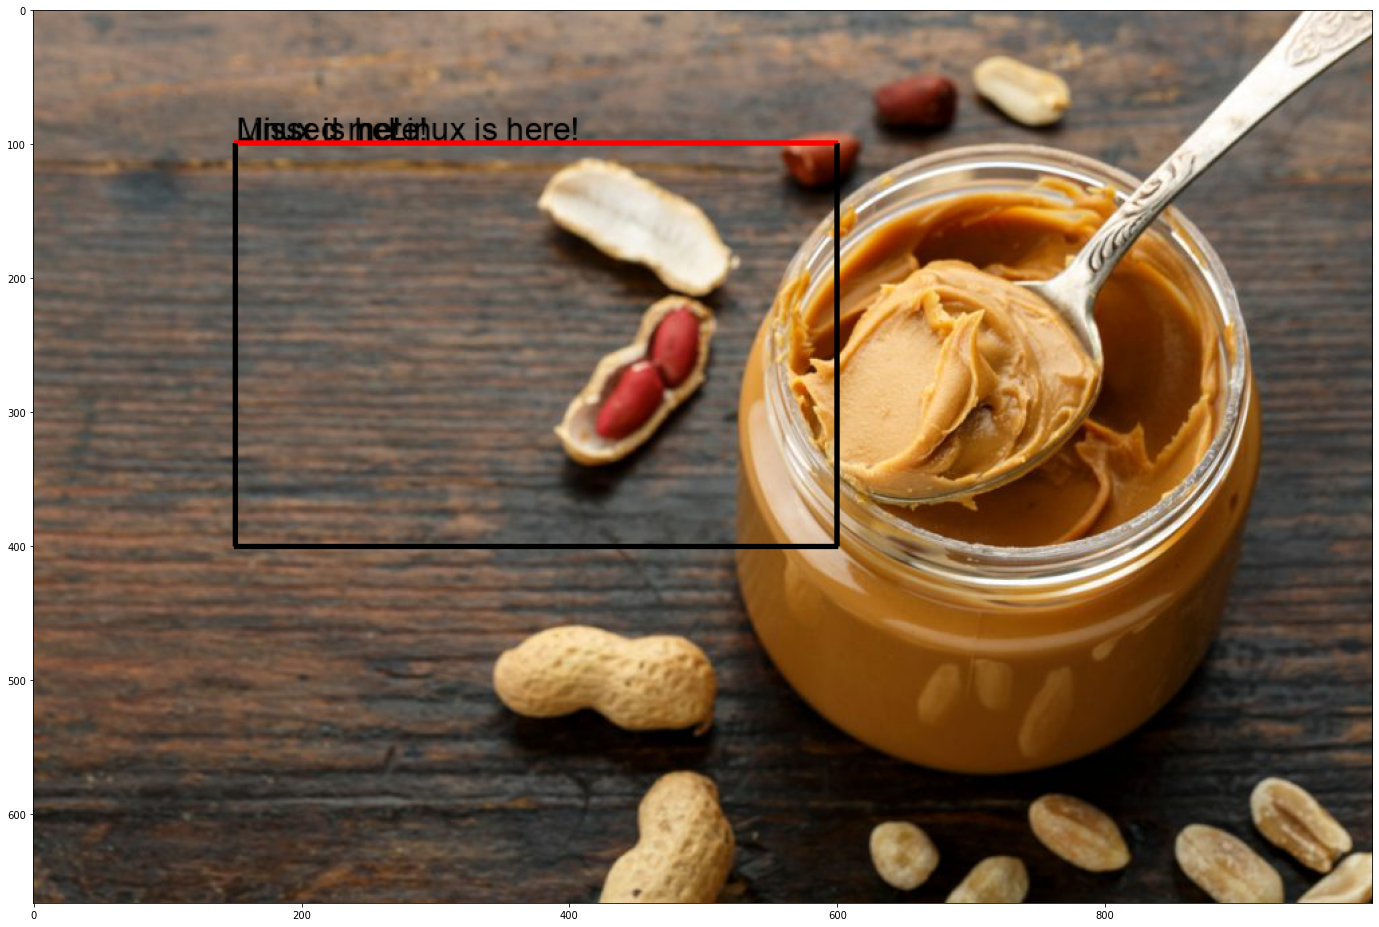

In [45]:
plt.figure(figsize=(24,32))
plt.imshow(image)
plt.show()

We can also add text to the image using the `draw.text()` function.

In [22]:
font = ImageFont.truetype('arial.ttf', 24)
display_str = "                 Linux is here!"

text_bottom = top
text_width, text_height = font.getsize(display_str)
margin = np.ceil(0.05 * text_height)

draw.text(
    (left + margin, text_bottom - text_height - margin),
    display_str,
    fill='black',
    font=font)

In [50]:
print(text_height)
margin_raw = 0.05 * text_height
print(margin_raw)
margin = np.ceil(margin_raw)
print(margin)

print(left)
print(margin)
print(text_bottom)
print(text_height)
print((left + margin, text_bottom - text_height - margin))

22
1.1
2.0
150
2.0
100
22
(152.0, 76.0)


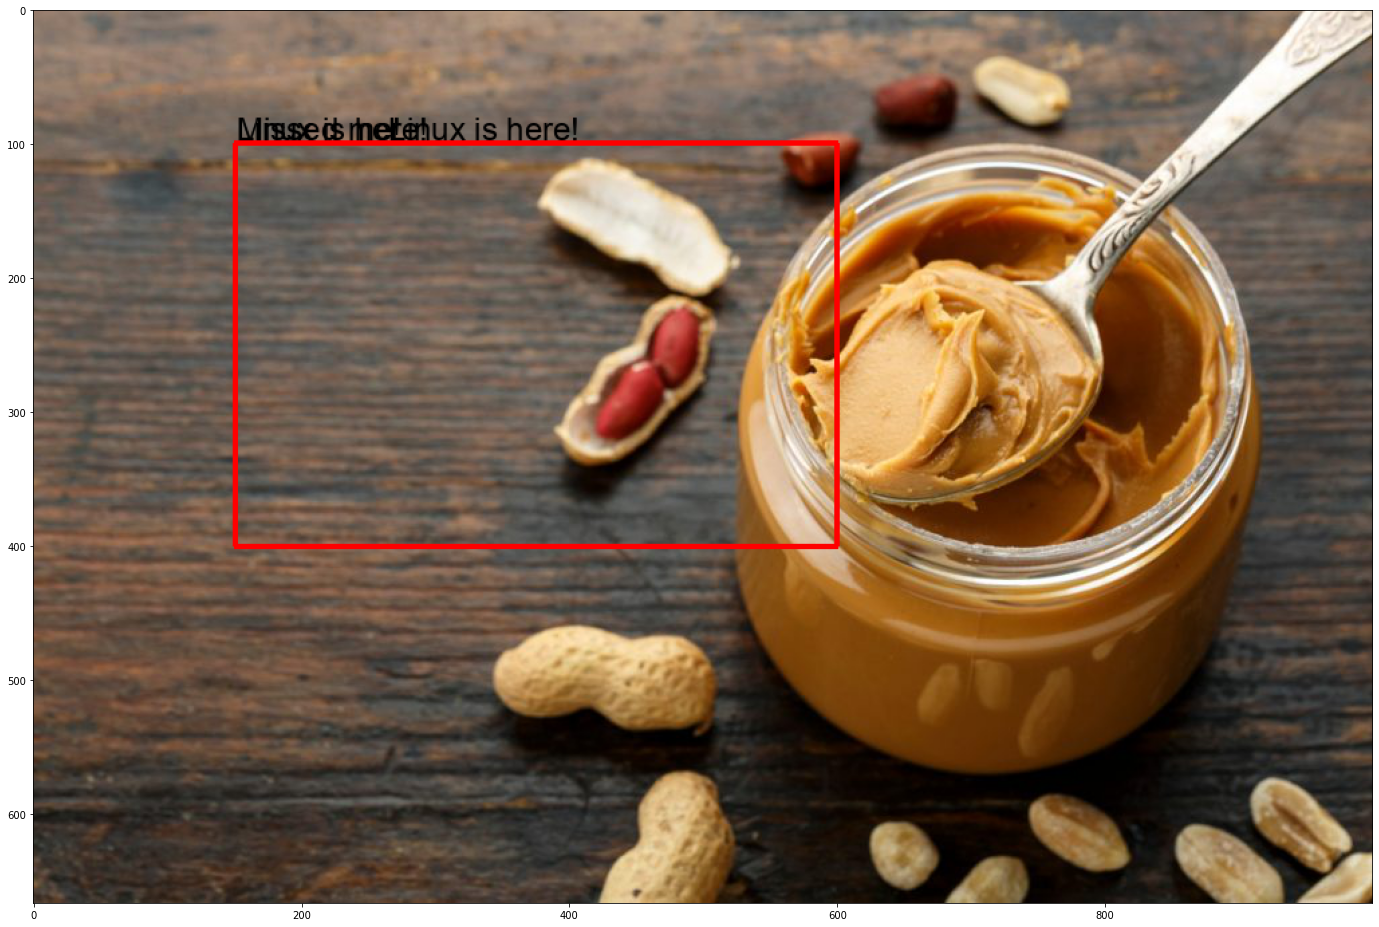

In [23]:
plt.figure(figsize=(24,32))
plt.imshow(image)
plt.show()

Dive into the documents and keep adding things to the image!

Explore restarting the notebook and see how you can change the execution order of the cells!

We can use a python function to combine a bunch of these pieces into a single block of code. The way this works is that we define (using `def`) a function named `draw_bounding_box_on_image` (the name is something we pick). The next piece is the list of tings contained in parenthesis (). This is the list of things we need in the function. Some of them have default values (like `color='red'`), but the first 5 do not.

We have to run the cell to execute the code and define the function. If we re-define or modify the function in any way, we'll have to re-run the cell to put those changes into memory.

In [ ]:
def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color='red',
                               thickness=4,
                               display_str_list=(),
                               use_normalized_coordinates=True):
  """Adds a bounding box to an image.

  Bounding box coordinates can be specified in either absolute (pixel) or
  normalized coordinates by setting the use_normalized_coordinates argument.

  Each string in display_str_list is displayed on a separate line above the
  bounding box in black text on a rectangle filled with the input 'color'.
  If the top of the bounding box extends to the edge of the image, the strings
  are displayed below the bounding box.

  Args:
    image: a PIL.Image object.
    ymin: ymin of bounding box.
    xmin: xmin of bounding box.
    ymax: ymax of bounding box.
    xmax: xmax of bounding box.
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list: list of strings to display in box
                      (each to be shown on its own line).
    use_normalized_coordinates: If True (default), treat coordinates
      ymin, xmin, ymax, xmax as relative to the image.  Otherwise treat
      coordinates as absolute.
  """
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  if use_normalized_coordinates:
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
  else:
    (left, right, top, bottom) = (xmin, xmax, ymin, ymax)
  if thickness > 0:
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
               (left, top)],
              width=thickness,
              fill=color)
  try:
    font = ImageFont.truetype('arial.ttf', 24)
  except IOError:
    font = ImageFont.load_default()

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = bottom + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle(
        [(left, text_bottom - text_height - 2 * margin), (left + text_width,
                                                          text_bottom)],
        fill=color)
    draw.text(
        (left + margin, text_bottom - text_height - margin),
        display_str,
        fill='black',
        font=font)
    text_bottom -= text_height - 2 * margin


Now we call the function and look at the output.

In [ ]:
path = "imagetests/image1.jpg"
image = Image.open(path)

draw_bounding_box_on_image(image,
                           ymin=0.1,
                           xmin=0.3,
                           ymax=0.8,
                           xmax=0.9,
                           color='green',
                           thickness=4,
                           display_str_list=['I am the text'],
                           use_normalized_coordinates=True)

plt.figure(figsize=(24,32))
plt.imshow(image)
plt.show()

## Combining Images

We can also combine images in a number of ways. One way uses the following code.

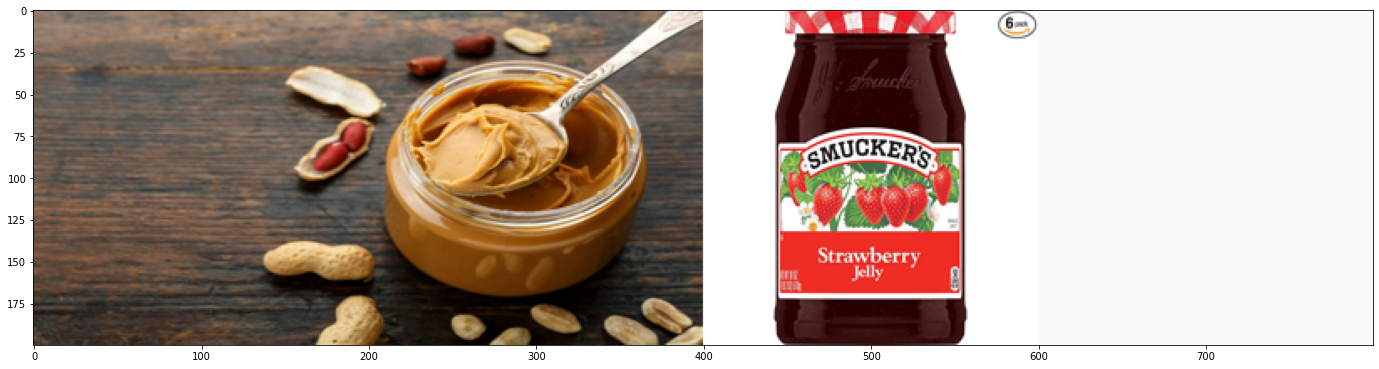

In [24]:
image1 = Image.open('imagetests/image1.jpg')
image2 = Image.open('imagetests/image2.jpg')

#resize, first image
image1 = image1.resize((400, 200))
image1_size = image1.size
image2 = image2.resize((200, 200))
image2_size = image2.size
new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
new_image.paste(image1,(0,0))
new_image.paste(image2,(image1_size[0],0))
plt.figure(figsize=(24,32))
plt.imshow(new_image)
plt.show()

We could also merge them one on top of the other like this. Explore what you get if you change which color bands get used in the merged image (lots of possibilities!)

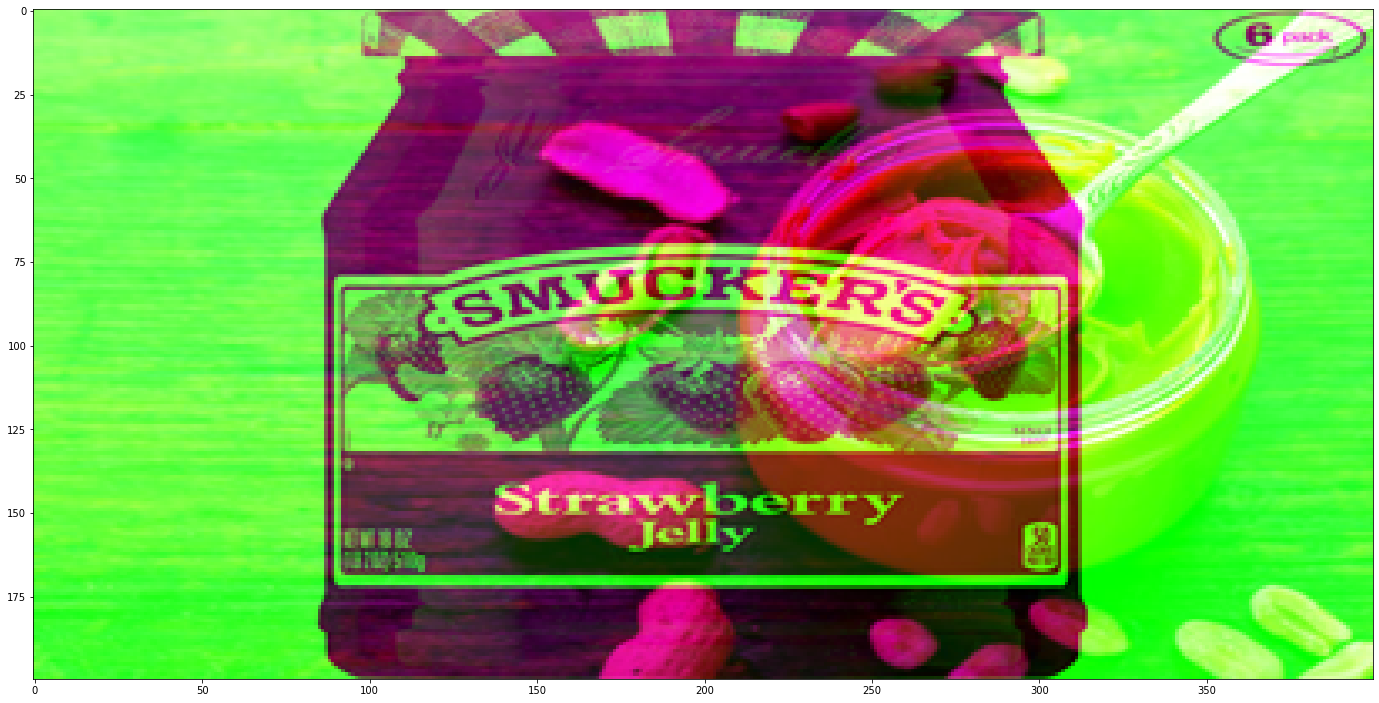

In [41]:
image1 = Image.open('imagetests/image1.jpg')
image2 = Image.open('imagetests/image2.jpg')

#resize, first image
image1 = image1.resize((400, 200))
image1_size = image1.size
image2 = image2.resize((400, 200))
image2_size = image2.size

image1_bands = image1.split()
image2_bands = image2.split()

merged = Image.merge("RGB", (image1_bands[0], image2_bands[1], image1_bands[2]))

plt.figure(figsize=(24,32))
plt.imshow(merged)
plt.show()


In [38]:
g1.show()

Here's another option using `blend`. This is a good time to go back to the documenation and look for other tools you could use!

In [ ]:
image1 = Image.open('imagetests/image1.jpg')
image2 = Image.open('imagetests/image2.jpg')

#resize, first image
image1 = image1.resize((400, 200))
image1_size = image1.size
image2 = image2.resize((400, 200))
image2_size = image2.size

merged = Image.blend(image1, image2, 0.5)

plt.figure(figsize=(24,32))
plt.imshow(merged)
plt.show()


# Week 1 Project

Choose an image (or a couple of images) and use the PIL library to decorate or annotate the images (think meme!). You will share your image(s) with the team at the start of the call next Monday.